In [54]:
import pandas as pd
final_df_2 = pd.read_csv('../Capstone/final_df_2.csv')

In [55]:
final_df_2.drop(['Unnamed: 0'], axis=1, inplace=True)

In [56]:
final_df_2 = pd.get_dummies(final_df_2, columns=['team_x', 'team_y'])

#  Train/Test Split

In [77]:
from sklearn.cross_validation import train_test_split

y = final_df_2['winner']
X = final_df_2.iloc[:, 4:]

In [78]:
X.head(1)

,week,day_of_week,defense_ast_x,defense_ffum_x,defense_fgblk_x,defense_frec_x,defense_frec_tds_x,defense_frec_yds_x,defense_int_x,defense_int_tds_x,...,team_y_OAK,team_y_PHI,team_y_PIT,team_y_SD,team_y_SEA,team_y_SF,team_y_STL,team_y_TB,team_y_TEN,team_y_WAS
0,1,4,25,1,1,1,0,5,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [79]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: winner, dtype: int64

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
print y_train.shape
print X_train.shape

(1302,)
(1302, 214)


# Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [83]:
model = logreg.fit(X_train,y_train)

In [84]:
model.score(X_train, y_train)

0.99231950844854067

In [85]:
from sklearn import metrics

predicted = model.predict(X_test)
prob = model.predict_proba(X_test)

print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, prob[:, 1])

0.942652329749
0.9871350751


In [86]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[215  17]
 [ 15 311]]
             precision    recall  f1-score   support

          0       0.93      0.93      0.93       232
          1       0.95      0.95      0.95       326

avg / total       0.94      0.94      0.94       558



In [87]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=5)
print scores
print scores.mean()

[ 0.94101877  0.95174263  0.93010753  0.93530997  0.9541779 ]
0.942471358321


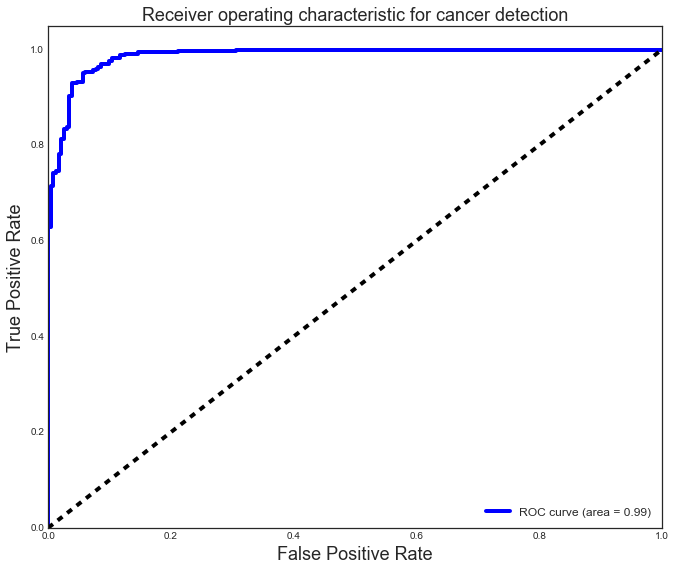

In [88]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

y_score = logreg.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

FPR[1], TPR[1], _ = roc_curve(y_test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [90]:
cross_val_score(dtc, X_train, y_train, cv=5).mean()

0.83486200822078693

In [91]:
dtc_predicted = dtc.predict(X_test)
dtc_prob = dtc.predict_proba(X_test)

print metrics.accuracy_score(y_test, dtc_predicted)
print metrics.roc_auc_score(y_test, dtc_prob[:, 1])
print metrics.confusion_matrix(y_test, dtc_predicted)
print metrics.classification_report(y_test, dtc_predicted)

0.847670250896
0.84726041887
[[196  36]
 [ 49 277]]
             precision    recall  f1-score   support

          0       0.80      0.84      0.82       232
          1       0.88      0.85      0.87       326

avg / total       0.85      0.85      0.85       558



In [92]:
dtc_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

from sklearn.grid_search import GridSearchCV

dtc_gs = GridSearchCV(DecisionTreeClassifier(), dtc_params, cv=5, verbose=1)

In [93]:
dtc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 385 candidates, totalling 1925 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    7.9s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:   12.8s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:   20.0s
[Parallel(n_jobs=1)]: Done 1925 out of 1925 | elapsed:   21.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50], 'max_depth': [None, 1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [94]:
dtc_best = dtc_gs.best_estimator_
print dtc_best
print dtc_gs.best_params_
print dtc_gs.best_score_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
{'max_features': None, 'min_samples_split': 2, 'max_depth': 4}
0.845622119816


In [95]:
dtfi = pd.DataFrame({
        'feature':X.columns,
        'importance':dtc_best.feature_importances_
    })

dtfi.sort_values('importance', ascending=False, inplace=True)
dtfi.head()

,feature,importance
36,kicking_tot_x,0.438706
110,kicking_tot_y,0.225884
148,turnovers_y,0.160161
74,turnovers_x,0.114596
39,kicking_xpmade_x,0.019379


# Bagging Decision Tree

In [96]:
from sklearn.ensemble import BaggingClassifier
bdtc = BaggingClassifier(DecisionTreeClassifier())

cross_val_score(bdtc, X_train, y_train, cv=5, n_jobs=-1)

array([ 0.90839695,  0.84230769,  0.85769231,  0.86923077,  0.88846154])

In [99]:
params = {'base_estimator__max_depth': [3,5,10,20],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
         }

gsbdt = GridSearchCV(bdtc, params, n_jobs=-1, cv=5)

In [100]:
gsbdt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, ...n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [0.5, 0.7, 1.0], 'max_samples': [0.5, 0.7, 1.0], 'base_estimator__max_depth': [3, 5, 10, 20], 'n_estimators': [2, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [101]:
gsbdt_predicted = gsbdt.predict(X_test)
gsbdt_prob = gsbdt.predict_proba(X_test)

print metrics.accuracy_score(y_test, gsbdt_predicted)
print metrics.roc_auc_score(y_test, gsbdt_prob[:, 1])

0.897849462366
0.964228104506


In [102]:
gsbdt.best_params_

{'base_estimator__max_depth': 20,
 'max_features': 0.5,
 'max_samples': 1.0,
 'n_estimators': 20}

In [103]:
gsbdt.best_score_

0.90015360983102921

# Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [107]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [108]:
cross_val_score(rfc, X_train, y_train, cv=5)

array([ 0.87022901,  0.85769231,  0.86538462,  0.86923077,  0.89230769])

In [109]:
rfc_predicted = rfc.predict(X_test)
rfc_prob = rfc.predict_proba(X_test)

print metrics.accuracy_score(y_test, rfc_predicted)
print metrics.roc_auc_score(y_test, rfc_prob[:, 1])

0.863799283154
0.939344457373


In [110]:
rfc_gs = GridSearchCV(RandomForestClassifier(), dtc_params, cv=5, verbose=1)

In [111]:
rfc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 385 candidates, totalling 1925 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   11.1s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:   18.2s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   28.3s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:   40.8s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done 1925 out of 1925 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50], 'max_depth': [None, 1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [112]:
rfc_best = rfc_gs.best_estimator_
print rfc_best
print rfc_gs.best_params_
print rfc_gs.best_score_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=30,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
{'max_features': None, 'min_samples_split': 30, 'max_depth': None}
0.894777265745


In [113]:
rffi = pd.DataFrame({
        'feature':X.columns,
        'importance':rfc_best.feature_importances_
    })

rffi.sort_values('importance', ascending=False, inplace=True)
rffi.head()

,feature,importance
36,kicking_tot_x,0.330971
110,kicking_tot_y,0.176874
148,turnovers_y,0.075334
142,rushing_att_y,0.074076
74,turnovers_x,0.051099


In [114]:
print metrics.confusion_matrix(y_test, rfc_predicted)
print metrics.classification_report(y_test, rfc_predicted)


[[195  37]
 [ 39 287]]
             precision    recall  f1-score   support

          0       0.83      0.84      0.84       232
          1       0.89      0.88      0.88       326

avg / total       0.86      0.86      0.86       558



In [115]:
rfc_prob

array([[ 0.2,  0.8],
       [ 0.2,  0.8],
       [ 0.6,  0.4],
       ..., 
       [ 0. ,  1. ],
       [ 0.6,  0.4],
       [ 1. ,  0. ]])

# More Data Cleaning

In [116]:
final_df_copy = pd.DataFrame(final_df_2)

In [117]:
import re
defenseless_yds_df = final_df_copy.select(lambda x: not re.search('defense(.*?)yds', x), axis=1)

In [122]:
y_less_def_yds = defenseless_yds_df['winner']
X_less_def_yds = defenseless_yds_df.iloc[:, 4:]

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_less_def_yds, y_less_def_yds, test_size=.3, random_state=42)

In [125]:
mod_less = logreg.fit(X_train, y_train)

In [126]:
mod_less.score(X_less_def_yds, y_less_def_yds)

0.97795698924731178

In [127]:
from sklearn import metrics

predicted = mod_less.predict(X_test)
prob = mod_less.predict_proba(X_test)

print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, prob[:, 1])

0.948028673835
0.9876110641


In [130]:
final_df_copy.columns.tolist()

['gsis_id',
 'winner',
 'score_x',
 'score_y',
 'week',
 'day_of_week',
 'defense_ast_x',
 'defense_ffum_x',
 'defense_fgblk_x',
 'defense_frec_x',
 'defense_frec_tds_x',
 'defense_frec_yds_x',
 'defense_int_x',
 'defense_int_tds_x',
 'defense_int_yds_x',
 'defense_misc_tds_x',
 'defense_misc_yds_x',
 'defense_pass_def_x',
 'defense_puntblk_x',
 'defense_qbhit_x',
 'defense_safe_x',
 'defense_sk_x',
 'defense_sk_yds_x',
 'defense_tkl_x',
 'defense_tkl_loss_x',
 'defense_tkl_loss_yds_x',
 'defense_tkl_primary_x',
 'defense_xpblk_x',
 'fumbles_forced_x',
 'fumbles_notforced_x',
 'fumbles_oob_x',
 'fumbles_rec_x',
 'fumbles_rec_tds_x',
 'fumbles_rec_yds_x',
 'fumbles_tot_x',
 'kicking_all_yds_x',
 'kicking_fgb_x',
 'kicking_fgm_yds_x',
 'kicking_i20_x',
 'kicking_rec_x',
 'kicking_tot_x',
 'kicking_touchback_x',
 'kicking_xpb_x',
 'kicking_xpmade_x',
 'kicking_xpmissed_x',
 'kickret_fair_x',
 'kickret_ret_x',
 'kickret_tds_x',
 'kickret_yds_x',
 'passing_cmp_air_yds_x',
 'passing_incmp_x'